# Experiment Notebook
This notebook is created for experimentation and testing in the `_sandbox` folder.

In [1]:
# Import Required Libraries
import numpy as np
import pickle
import os
import pprint as pp

samples_dir = "/home/mg873uh/Projects_kb/data/pretrain_preproc/FOMO60k"

In [2]:
# List 50 random .npy samples and their dimensions
npy_files = [f for f in os.listdir(samples_dir) if f.endswith('.npy')]
random_samples = np.random.choice(npy_files, size=50, replace=False)

sample_dimensions = {}
for sample in random_samples:
    sample_path = os.path.join(samples_dir, sample)
    data = np.load(sample_path)
    sample_dimensions[sample] = data.shape

print("Random .npy samples and their dimensions:")
pp.pprint(sample_dimensions)

Random .npy samples and their dimensions:
{'sub_1025_ses_1_swi.npy': (192, 190, 60),
 'sub_10363_ses_2_t1_4.npy': (138, 176, 136),
 'sub_1043_ses_1_dwi.npy': (173, 223, 162),
 'sub_10721_ses_1_t2.npy': (137, 179, 144),
 'sub_10902_ses_1_dwi.npy': (176, 186, 137),
 'sub_116_ses_1_t1.npy': (155, 231, 199),
 'sub_1552_ses_2_dwi_2.npy': (123, 168, 142),
 'sub_1651_ses_1_scan_17.npy': (144, 161, 143),
 'sub_1698_ses_1_scan_4.npy': (143, 169, 149),
 'sub_1710_ses_1_flair.npy': (126, 164, 141),
 'sub_1820_ses_1_t1_2.npy': (136, 165, 137),
 'sub_1893_ses_1_pd.npy': (138, 185, 154),
 'sub_2708_ses_1_t1.npy': (160, 256, 256),
 'sub_2871_ses_1_scan_5.npy': (145, 175, 157),
 'sub_3268_ses_1_scan_17.npy': (140, 188, 155),
 'sub_3325_ses_1_flair.npy': (148, 162, 150),
 'sub_3552_ses_1_t1.npy': (176, 250, 250),
 'sub_3557_ses_1_t1.npy': (132, 167, 148),
 'sub_3578_ses_1_scan_8.npy': (151, 166, 166),
 'sub_3756_ses_2_t1_4.npy': (154, 192, 60),
 'sub_3890_ses_1_t2.npy': (143, 162, 139),
 'sub_4074_ses_

In [5]:

pkl_sample_name= "sub_10000_ses_1_flair.pkl"

pkl_sample_path = os.path.join(samples_dir, pkl_sample_name)
with open(pkl_sample_path, "rb") as f:
    pkl_data = pickle.load(f)
print("Loaded .pkl file: ")
pp.pprint(pkl_data)

Loaded .pkl file: 
{'crop_to_nonzero': [49, 196, 22, 201, 0, 142],
 'foreground_locations': [],
 'label_cc_n': 0,
 'label_cc_sizes': 0,
 'new_direction': 'RAS',
 'new_size': [148, 180, 143],
 'new_spacing': [1.0, 1.0, 1.0],
 'nifti_metadata': {'affine': array([[   1.,    0.,    0., -240.],
       [   0.,    1.,    0.,   -1.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]]),
                    'final_direction': 'RAS',
                    'header': None,
                    'original_orientation': 'RAS',
                    'original_spacing': [1.0, 1.0, 1.0],
                    'reoriented': True},
 'original_orientation': 'RAS',
 'original_size': (240, 240, 155),
 'original_spacing': [1.0, 1.0, 1.0],
 'size_after_transpose': [148, 180, 143],
 'size_before_transpose': [148, 180, 143]}


Analyzing file: /home/mg873uh/Projects_kb/data/pretrain_preproc/FOMO60k/sub_7373_ses_1_swi.npy
Data shape: (192, 152, 55)
Data type: float32
Min value: 0.0000
Max value: 1.0000
Mean value: 0.3519
Std deviation: 0.3749


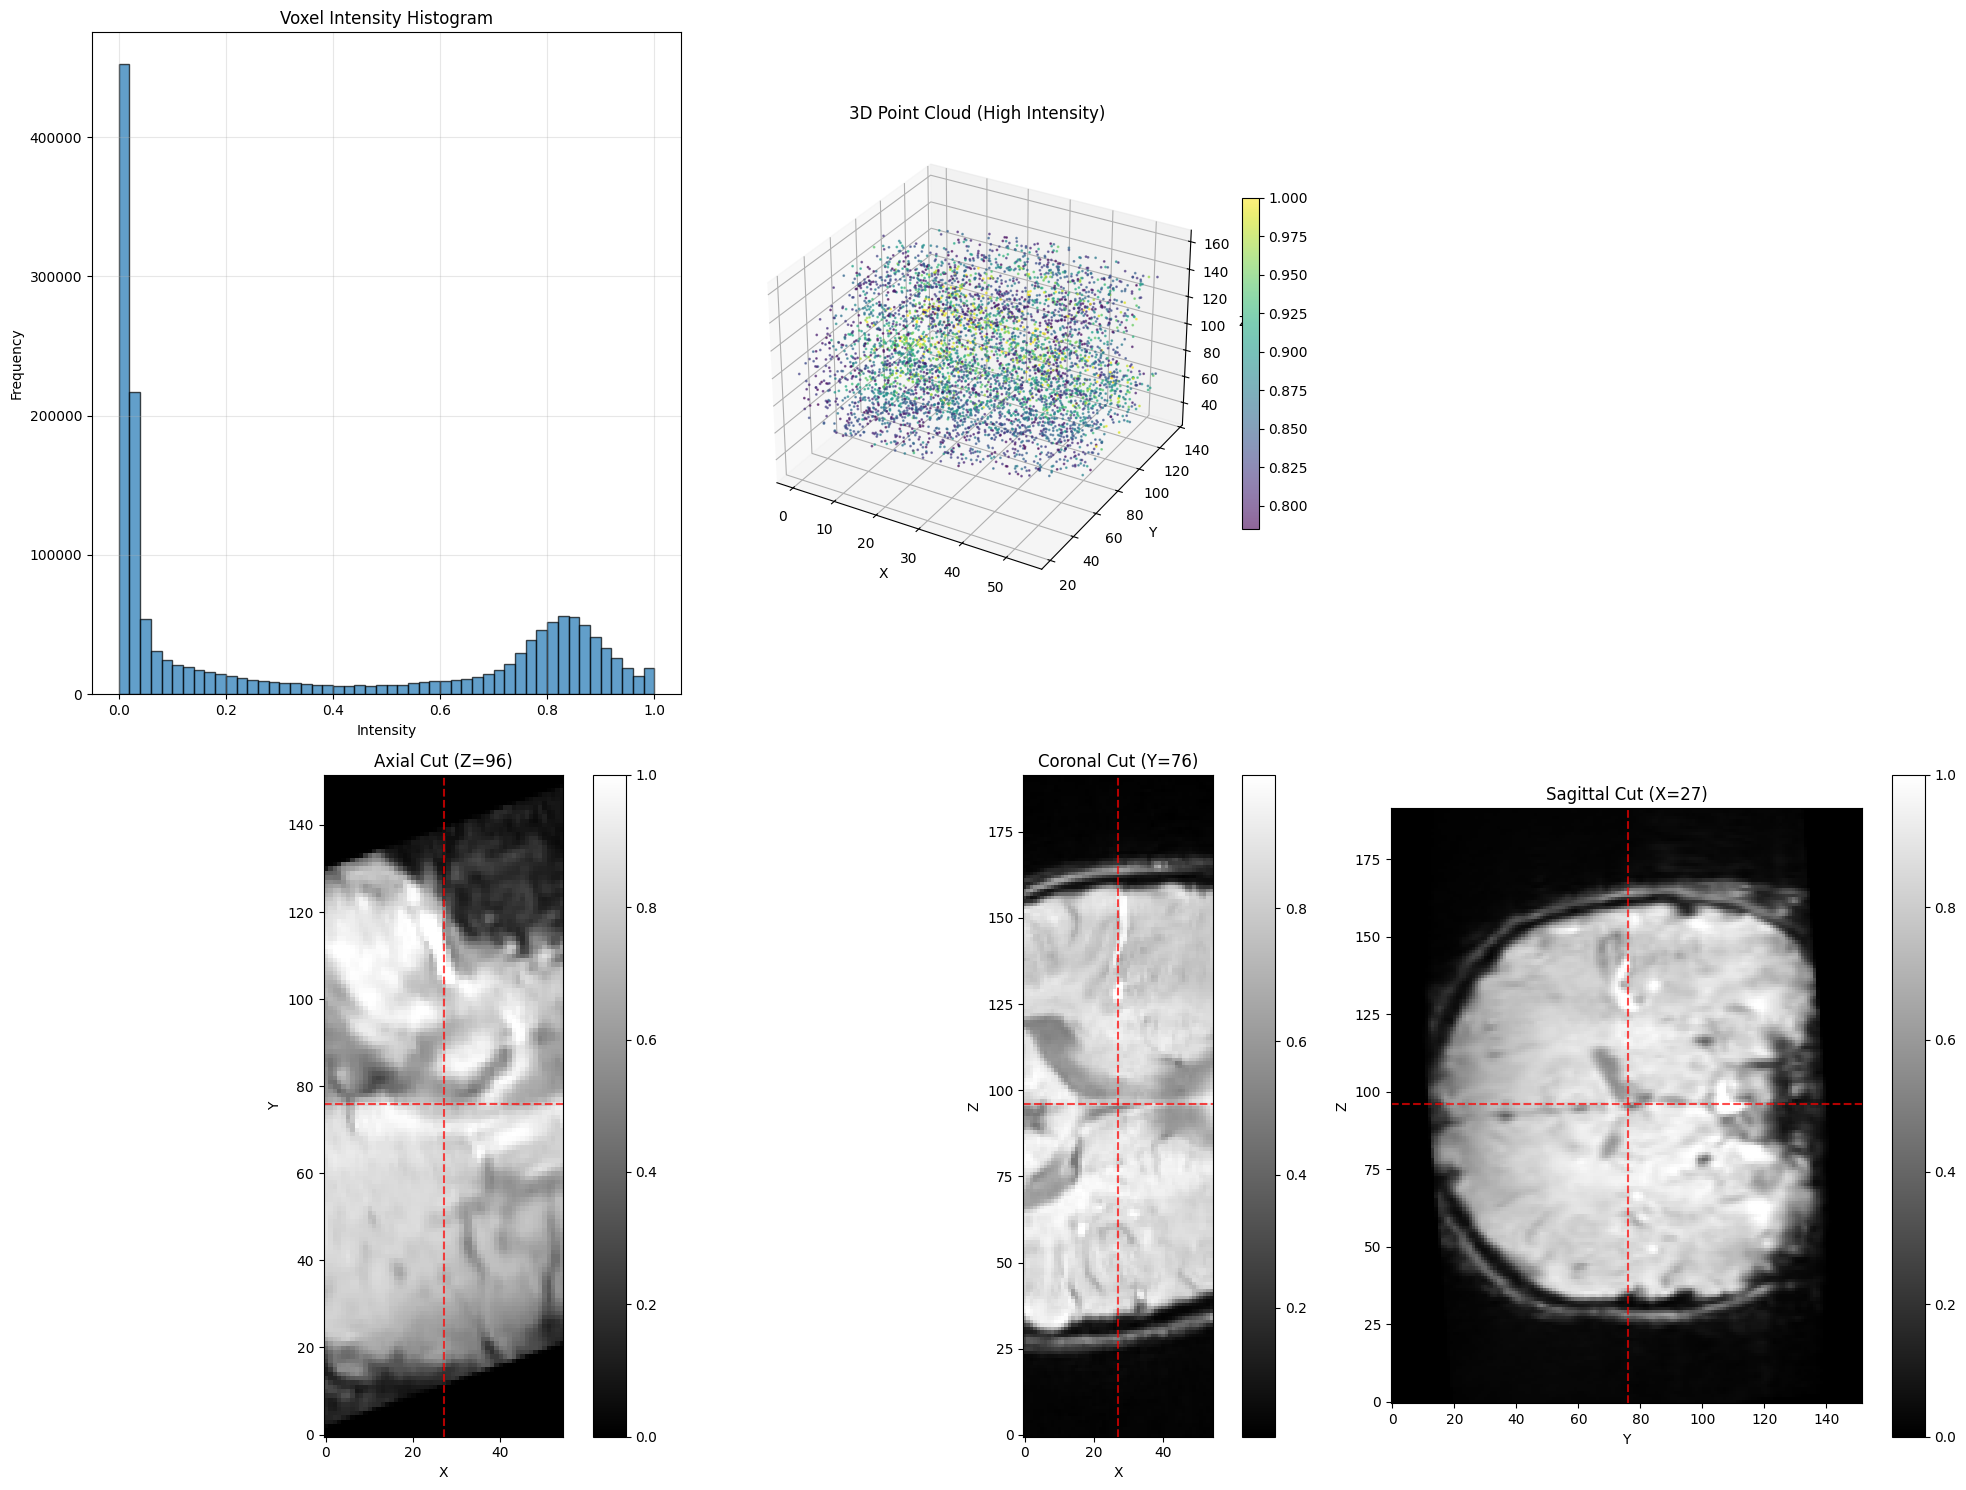


Center point for orthogonal cuts: (27, 76, 96)


In [ ]:
# Analysis of .npy files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def analyze_npy_file(npy_path):
    """
    Analyze a .npy file containing image data.
    - Display image information (dimensions, intensity histogram)
    - For 3D data: show 3D point cloud and orthogonal cuts (MPRs)
    """
    # Load the data
    data = np.load(npy_path)
    print(f"Analyzing file: {npy_path}")
    print(f"Data shape: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Min value: {data.min():.4f}")
    print(f"Max value: {data.max():.4f}")
    print(f"Mean value: {data.mean():.4f}")
    print(f"Std deviation: {data.std():.4f}")

    # Create figure with subplots
    if len(data.shape) == 3:
        fig = plt.figure(figsize=(20, 15))

        # 1. Intensity histogram
        plt.subplot(2, 3, 1)
        plt.hist(data.flatten(), bins=50, alpha=0.7, edgecolor='black')
        plt.title('Voxel Intensity Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)

        # 2. 3D point cloud (sample points for performance)
        ax_3d = fig.add_subplot(2, 3, 2, projection='3d')

        # Sample points to avoid overwhelming the plot
        z, y, x = np.where(data > np.percentile(data, 75))  # Show only high-intensity points
        sample_indices = np.random.choice(len(x), min(5000, len(x)), replace=False)
        x_sample = x[sample_indices]
        y_sample = y[sample_indices]
        z_sample = z[sample_indices]
        colors = data[z_sample, y_sample, x_sample]

        scatter = ax_3d.scatter(x_sample, y_sample, z_sample, c=colors,
                               cmap='viridis', alpha=0.6, s=1)
        ax_3d.set_title('3D Point Cloud (High Intensity)')
        ax_3d.set_xlabel('X')
        ax_3d.set_ylabel('Y')
        ax_3d.set_zlabel('Z')
        plt.colorbar(scatter, ax=ax_3d, shrink=0.5)

        # Calculate center point for orthogonal cuts
        center_z, center_y, center_x = data.shape[0]//2, data.shape[1]//2, data.shape[2]//2

        # 3. Axial cut (XY plane)
        plt.subplot(2, 3, 4)
        plt.imshow(data[center_z, :, :], cmap='gray', origin='lower')
        plt.title(f'Axial Cut (Z={center_z})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_y, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 4. Coronal cut (XZ plane)
        plt.subplot(2, 3, 5)
        plt.imshow(data[:, center_y, :], cmap='gray', origin='lower')
        plt.title(f'Coronal Cut (Y={center_y})')
        plt.xlabel('X')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 5. Sagittal cut (YZ plane)
        plt.subplot(2, 3, 6)
        plt.imshow(data[:, :, center_x], cmap='gray', origin='lower')
        plt.title(f'Sagittal Cut (X={center_x})')
        plt.xlabel('Y')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_y, color='red', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        print(f"\nCenter point for orthogonal cuts: ({center_x}, {center_y}, {center_z})")

    else:
        print(f"Unsupported data dimensions: {len(data.shape)}D")


npy_sample_name= "sub_7373_ses_1_swi.npy"
npy_sample_path = os.path.join(samples_dir, npy_sample_name)
analyze_npy_file(npy_sample_path)

